In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [23]:
def f(x):
    return 3*(x**2) +2*x +1

def df(x):
    dx = 0.0001
    xn = x + dx
    dy = f(xn) - f(x)
    z = dy/dx
    return z

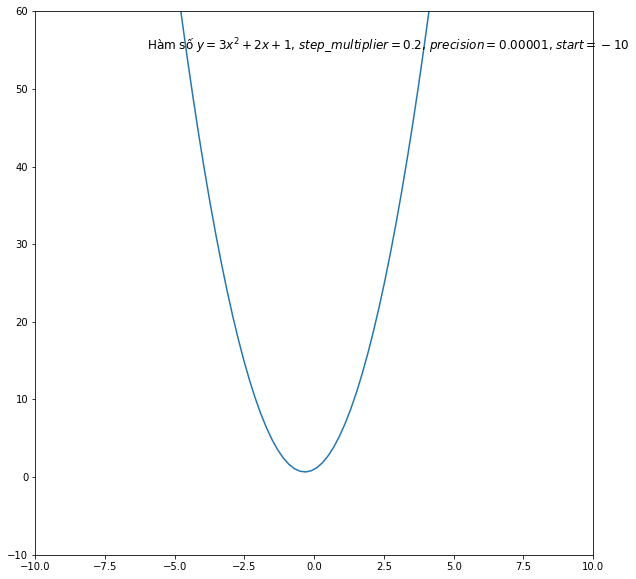

In [24]:
fig = plt.figure(figsize=[10, 10])
ax = plt.axes(xlim=(-10, 10), ylim=(-10, 60))
ax.text(-6, 55, 'Hàm số $y=3x^2+2x+1$, $step\_multiplier=0.2$, $precision=0.00001$, $start=-10$', fontsize=12)
label_1 = ax.text(-6, 50, '', fontsize=12)
label_2 = ax.text(0, 30, '', fontsize=20)

line, = ax.plot([], [], 'ro-', lw=5)
x = np.linspace(start=-10, stop=10, num=100)
y = f(x)
ax.plot(x,y)

In [37]:
x_1 = -10
x_0 = 0
step_multiplier = 0.2
precision = 0.00001

In [41]:
def animate(i):
    global x_0, x_1
    step_size = abs(x_1 - x_0)
    
    if step_size > precision:
        x_0 = x_1
        gradient = df(x_0)
        x_1 = x_0 - step_multiplier * gradient
        x = [x_0, x_1]
        y = [f(x_0), f(x_1)]
        line.set_data(x, y)
        label_2.set_text(str(i))
    label_1.set_text('Lần: ' + str(i) + '/50, cost:' + str(f(x_1)) + ', slope:' + str(df(x_1)))
    return line, 

In [42]:
x_0 = x_1
gradient = df(x_0)
x_1 = x_0 - step_multiplier * gradient
x_1

-0.33338313536112274

In [43]:
anim = FuncAnimation(fig, animate, frames=50, interval=400, blit=True)
anim.save('gradient_descent.gif', writer='imagemagick',  savefig_kwargs={'facecolor':'white'}, fps=1)

MovieWriter imagemagick unavailable.
